### 1. Loading Libraries & Downloading Datsets

In [1]:
import numpy as np
import pandas as pd

!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


### Loading dataset

In [59]:
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

- Different Job Roles
- Job role with maximum salary | salary pattern
- most demandable job role
- best company hiring for a specific job role
- total no of companie hitring for the role
- top responsibilities based on a job role

In [60]:
print('Earleir : ', len(df))

df.dropna(subset = 'job_id',inplace = True)
df['experience'].fillna('5-10 Yrs', inplace = True)
df['location'].fillna('Bangalore/Bengaluru', inplace = True)
df.dropna(subset = ['resposibilities','company'],inplace = True)

print('After : ', len(df))

Earleir :  79147
After :  78646


<ipython-input-60-974848b7da41>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna('5-10 Yrs', inplace = True)
<ipython-input-60-974848b7da41>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [65]:
print(len(df) - df['job_id'].nunique())

df.drop_duplicates(subset = 'job_id', inplace = True)

print(len(df) - df['job_id'].nunique())

5658
0


In [ ]:
df['job_id'] = df['job_id'].astype('int').astype('object')

In [67]:
df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


In [89]:
df['min_experience'] = df['experience'].str.replace(' Yrs','').str.split('-').str[0].astype('int')
df['max_experience'] = df['experience'].str.replace(' Yrs','').str.split('-').str[-1].astype('int')

df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,min_experience,max_experience
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213,1,6
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...,11,15
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,3,7
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,3,7
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73762,20123002989,Partner Success Executive/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Jalandhar, Chandigarh, Amritsar",NaN,NaN,"CRM,Communication Skills,Presentation Skills,C...",6 Days Ago,https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...,1,5
73763,20123002957,Partner Success Associate/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Ludhiana, Patiala, Moga",NaN,NaN,"CRM,Communication Skills,Presentation Skills,C...",6 Days Ago,https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...,1,5
73764,231222003986,Hiring For International Voice Process | Gurga...,First Step Solutions,1-4 Yrs,"3,00,000 - 4,50,000 PA.","New Delhi, Gurgaon/Gurugram",NaN,NaN,"Customer Service,US Process,Hospitality,Custom...",10 Days Ago,https://www.naukri.com/job-listings-hiring-for...,https://www.naukri.com/first-step-solutions-jo...,1,4
73765,171220001449,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3 Reviews,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403,0,2


In [114]:
experience_counts = []

for exp in range(df['min_experience'].min(), df['max_experience'].max() + 1):

  experience_counts.append([exp,len(df[(df['max_experience'] >= exp) & (df['min_experience'] <= exp)])])

experience_counts

experience_df = pd.DataFrame(experience_counts, columns=['Experience', 'Job Count'])

experience_df

,Experience,Job Count
0,0,9645
1,1,20059
2,2,28588
3,3,34993
4,4,37816
5,5,44515
6,6,37186
7,7,30542
8,8,26761
9,9,19537


<ipython-input-122-73fe1bb0927c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experience', y='Job Count', data=experience_df, palette='Oranges')


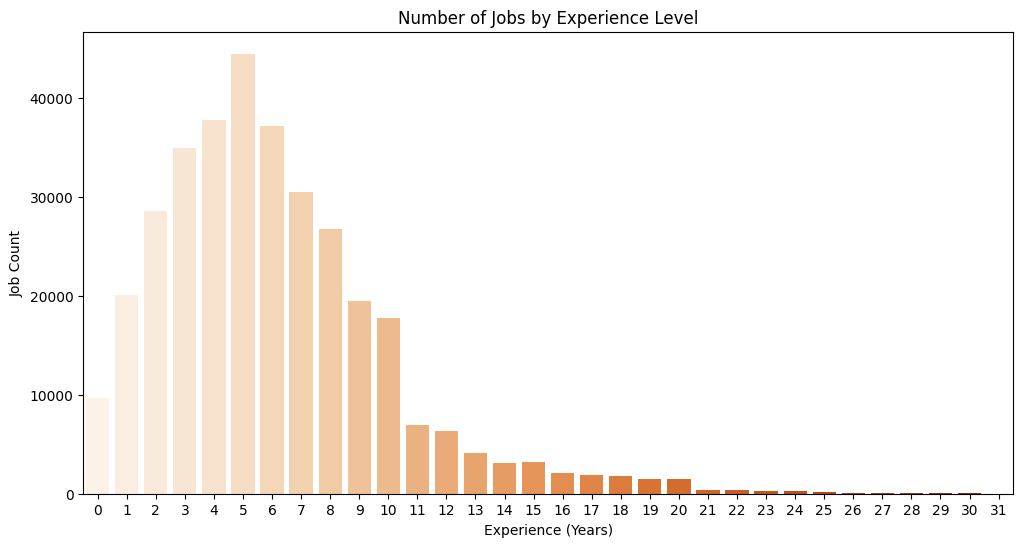

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust width and height as desired
sns.barplot(x='Experience', y='Job Count', data=experience_df, palette='Oranges')

plt.title('Number of Jobs by Experience Level')
plt.xlabel('Experience (Years)')
plt.ylabel('Job Count')
plt.show()

In [129]:
df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,min_experience,max_experience
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213,1,6
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...,11,15
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,3,7
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,3,7
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...,5,7


In [176]:
min_salary_lst = []
max_salary_lst = []

for salary in df['salary']:

  if salary != 'Not disclosed' and  salary != 'Not disclosed' and :

    salary = salary.split('(')[0]


    if 'Cr' in salary:
      max_salary = int(float(salary.split(' Cr')[0].split('-')[-1])*10000000)
      if len(salary.split(' Cr')[0].split('-')) == 2:
        min_salary = salary.split(' Cr')[0].split('-')[0]
      else:
        min_salary = max_salary

    else:
      min_salary = salary.split('-')[0].split(' ')[0]
      max_salary = salary.split('-')[-1]


    min_salary_lst.append(min_salary)
    max_salary_lst.append(max_salary)

  else:
    print(salary)

In [177]:
len(min_salary_lst)

32061

In [178]:
len(df)

72988

In [27]:
df = df.dropna(subset = ['host_name'])

In [29]:
df = df.dropna()

In [30]:
len(df)

10189

In [43]:
df['host_name'] = df['host_name'].fillna('Unknown')

In [45]:
len(df)

12805

In [49]:
len(df['id'])

12805

In [53]:
df['id'].nunique()

12805

In [54]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')

In [56]:
del df['Unnamed: 0']

In [15]:
df

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",...,4288,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am
12801,12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...",...,15200,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm
12802,12802,32977697,Paradise Eco Hub,4.67,3,Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...",...,9103,Uganda,1,2,2,0,1,0,After 3 00 pm,NaN
12803,12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,42262,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm


In [26]:
df[df['rating'] != 'New']['rating'].astype('float').mean()

np.float64(4.857475195517684)

In [19]:
df['rating'].isnull()

,rating
0,False
1,False
2,False
3,False
4,False
...,...
12800,False
12801,False
12802,False
12803,False


In [11]:
df['rating']

,rating
0,4.71
1,0.00
2,4.85
3,5.00
4,0.00
...,...
12800,4.94
12801,4.67
12802,4.67
12803,4.86


In [10]:
df['rating'].replace('New', 0, inplace = True)
df['rating'] = df['rating'].astype('float')

In [12]:
df['rating'].mean()

np.float64(3.249823506442796)

In [30]:
df['reviews'].astype('int')

ValueError: invalid literal for int() with base 10: '1,003'

In [31]:
df['reviews'] = df['reviews'].str.replace(',','').astype('int')

In [32]:
df['reviews'].mean()

np.float64(36.1400234283483)

In [33]:
df['clean_country'] = df['address'].str.split(',').str[-1].str.strip()

In [34]:
df['clean_country']

,clean_country
0,Turkey
1,Turkey
2,Georgia
3,Turkey
4,Turkey
...,...
12800,South Korea
12801,Indonesia
12802,Uganda
12803,Indonesia


In [129]:
df[df['address'].str.split(',').str.len() == 5]

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,clean_country
726,31948358,Unique One Bed Apartment,4.92,25,Kushag,6664835.0,"Walkeshwar, Malabar Hill, Mumbai, Maharashtra,...","4 guests,1 bedroom,1 bed,2 bathrooms","Kitchen,Wifi,TV,Free washer – In unit,Dryer,AC...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,India,2,1,4,0,1,0,10 00 am - 8 00 pm,1 00 pm,India
833,45372012,Blue heights,4.87,31,Clifford,225564379.0,"Ashvem, Mandrem, Pernem, Goa, India","4 guests,2 bedrooms,2 beds,1 bathroom","Mountain view,Beach access – Beachfront,Kitche...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,India,1,2,4,0,2,0,12 00 pm - 2 00 pm,12 00 pm,India
835,30009524,Ashvem blue nest(Britto’s guest house),4.70,42,Clifford,225564379.0,"Ashvem, Mandrem, Pernem, Goa, India","4 guests,2 bedrooms,2 beds,1 bathroom","Beach access – Beachfront,Kitchen,Wifi,Dedicat...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,India,1,2,4,0,2,0,Flexible,12 00 pm,India
1044,16199324,Comfortable cabanas in the paradise,4.60,127,Krishan,105794101.0,"Tangalle, Southern Province, LK, southern, Sri...","2 guests,1 bedroom,1 bed,1 shared bathroom","Beach access,Wifi,Dedicated workspace,Free par...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Sri Lanka,1,1,2,0,1,0,Flexible,12 00 pm,Sri Lanka
1138,7055469,Cute Bamboo Bungalow Erawan N.Park Shanti Farm,4.62,13,Kim,34795931.0,"Kanchanaburi Erawan National Park, Kanchanabur...","2 guests,1 bedroom,1 bed,1 bathroom","Long-term stays allowed,Unavailable: Carbon mo...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Thailand,1,1,2,0,1,0,NaN,NaN,Thailand
3363,53259108,2 bedrooms appartement with enclosed garden an...,0.00,0,"Loic, Estelle And Co",431170929.0,"Punta Penna, Brindisi, Puglia, Italy, Italy","4 guests,2 bedrooms,3 beds,1 bathroom","Kitchen,Wifi,Free parking on premises,Pets all...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Italy,1,3,4,0,2,0,1 00 pm - 7 00 pm,10 00 am,Italy
3402,6235753,Trullo Colori del Salento,4.93,56,Caterina,21910788.0,"Ostuni, Brindisi, Puglia, Italy, Italy","6 guests,3 bedrooms,4 beds,2 bathrooms","Garden view,Valley view,Kitchen,Wifi,Free park...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Italy,2,4,6,0,3,0,After 4 00 pm,10 00 am,Italy
3465,43252774,"Ai Trulli | Between Ostuni & Cisternino, Puglia",5.00,5,Giovanni,343940523.0,"Ostuni, Brindisi, Puglia, Italy, Italy","8 guests,4 bedrooms,4 beds,4 bathrooms","Park view,Kitchen,Wifi,Dedicated workspace,Fre...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Italy,4,4,8,0,4,0,3 00 pm - 8 00 pm,10 00 am,Italy
3564,35992843,Trulli Pasquina,4.59,101,Giuseppe,220091488.0,"Martina Franca, Taranto, Puglia, Italy, Italy","4 guests,2 bedrooms,3 beds,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Italy,1,3,4,0,2,0,3 00 pm - 7 00 pm,10 00 am,Italy
4660,33463825,Terrace like a cafe where you can enjoy a barb...,4.94,297,은아,242197018.0,"Deokjindong 1(il)-ga, Deokjin-gu, Jeonju, Nort...","5 guests,1 bedroom,2 beds,1.5 bathrooms","City skyline view,Kitchen,Wifi,Free parking on...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,South Korea,1,2,5,0,1,0,After 3 00 pm,11 00 am,South Korea


In [131]:
df['features']

,features
0,"2 guests,2 bedrooms,1 bed,1 bathroom"
1,"4 guests,2 bedrooms,2 beds,2 bathrooms"
2,"4 guests,1 bedroom,3 beds,1 bathroom"
3,"4 guests,1 bedroom,2 beds,1 bathroom"
4,"2 guests,1 bedroom,1 bed,1 bathroom"
...,...
12800,"4 guests,8 bathrooms"
12801,"2 guests,1 bedroom,1 bed,Toilet with sink"
12802,"2 guests,1 bedroom,2 beds,1 private bathroom"
12803,"8 guests,2 bedrooms,4 beds,2.5 bathrooms"


In [132]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,clean_country
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,Turkey
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,Turkey
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,Georgia
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,Turkey
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,Turkey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...",...,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am,South Korea
12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm,Indonesia
12802,32977697,Paradise Eco Hub,4.67,3,Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Uganda,1,2,2,0,1,0,After 3 00 pm,NaN,Uganda
12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm,Indonesia


In [145]:
country = 'Japan'

print(int(df[df['clean_country'] == country]['price'].min()))
print(int(df[df['clean_country'] == country]['price'].mean()))
print(int(df[df['clean_country'] == country]['price'].max()))

1330
10416
64317


In [150]:
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


In [153]:
df['company'].nunique()

15313